In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

import seaborn as sns
from collections import Counter

%matplotlib inline

## load the data

In [2]:
INPUT_FILE = '../../data/tmp/demoClean.csv'


In [4]:
data = pd.read_csv(INPUT_FILE)

In [5]:
data.shape

(43185, 69)

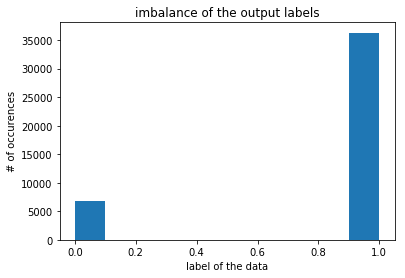

In [6]:
plt.hist(data.loan_status)
plt.title('imbalance of the output labels')
plt.xlabel('label of the data')
plt.ylabel('# of occurences')
plt.show()

In [7]:
#drop features that contain too much info

over = ['total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 
       'collection_recovery_fee','last_pymnt_amnt' ,  ]
data = data.drop(over, axis=1)

## over and undersampling to get a balanced dataset

In [8]:
data_over = data[data['loan_status']==0].sample(15000, replace=True).reset_index()

In [9]:
data_under = data[data['loan_status']==1].sample(15000, replace=False).reset_index()

In [10]:
data_balanced = pd.concat([data_over, data_under], axis=0)

In [11]:
data_balanced = data_balanced.sample(frac=1)

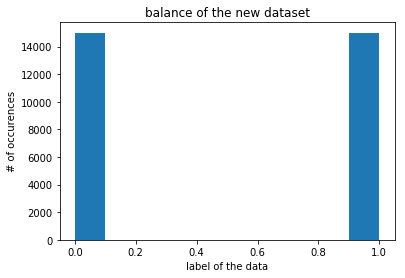

In [12]:
plt.hist(data_balanced.loan_status)
plt.title('balance of the new dataset')
plt.xlabel('label of the data')
plt.ylabel('# of occurences')
plt.show()

## split test train

In [13]:
train_data, test_data = train_test_split(data_balanced, test_size = 0.2)

In [14]:
X_train=train_data.drop('loan_status', axis=1)
X_test=test_data.drop('loan_status', axis=1)
y_train = train_data['loan_status']
y_test = test_data['loan_status']

In [15]:
data_balanced.shape

(30000, 63)

## fit model

In [16]:
model = LogisticRegression().fit(X_train, y_train)

In [17]:
preds = model.predict(X_test)

In [18]:
model.score(X_test,y_test)

0.7016666666666667

In [21]:
Counter(preds)

Counter({0: 2539, 1: 3461})

In [22]:
[np.abs(model.coef_[0])>0.1]

[array([False, False, False, False,  True, False, False, False, False,
        False, False,  True, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False,  True,  True, False, False, False, False,  True,
        False, False, False, False, False, False, False,  True, False,
        False,  True, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False])]

In [23]:
[np.abs(model.coef_[0])>0.1]

[array([False, False, False, False,  True, False, False, False, False,
        False, False,  True, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False,  True,  True, False, False, False, False,  True,
        False, False, False, False, False, False, False,  True, False,
        False,  True, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False])]